In [2]:
import gdown

import matplotlib.pyplot as plt

import torch
from torch.nn import functional as F
from torchvision.transforms import ToPILImage
from torchvision.utils import make_grid

import PIL
from torchvision.transforms import Resize, CenterCrop, ToTensor

from IPython import display


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
gdown.download('https://drive.google.com/uc?id=1znzQPjxxpulGv_Uqk7uajUjQue8LsG0z', fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1znzQPjxxpulGv_Uqk7uajUjQue8LsG0z
To: /content/val2014_udnie.zip
100%|██████████| 838M/838M [00:27<00:00, 30.9MB/s]


'val2014_udnie.zip'

In [5]:
!unzip val2014_udnie.zip

Streaming output truncated to the last 5000 lines.
  inflating: val2014_udnie_preserve_color/COCO_val2014_000000122166.jpg  
  inflating: val2014_udnie_preserve_color/COCO_val2014_000000041848.jpg  
  inflating: val2014_udnie_preserve_color/COCO_val2014_000000141779.jpg  
  inflating: val2014_udnie_preserve_color/COCO_val2014_000000573962.jpg  
  inflating: val2014_udnie_preserve_color/COCO_val2014_000000131856.jpg  
  inflating: val2014_udnie_preserve_color/COCO_val2014_000000268854.jpg  
  inflating: val2014_udnie_preserve_color/COCO_val2014_000000564404.jpg  
  inflating: val2014_udnie_preserve_color/COCO_val2014_000000094865.jpg  
  inflating: val2014_udnie_preserve_color/COCO_val2014_000000179392.jpg  
  inflating: val2014_udnie_preserve_color/COCO_val2014_000000084123.jpg  
  inflating: val2014_udnie_preserve_color/COCO_val2014_000000056932.jpg  
  inflating: val2014_udnie_preserve_color/COCO_val2014_000000492968.jpg  
  inflating: val2014_udnie_preserve_color/COCO_val2014_000000

In [6]:
! wget http://images.cocodataset.org/zips/val2014.zip
! wget https://raw.githubusercontent.com/tylin/coco-caption/master/annotations/captions_val2014.json
# ! unzip -q val2014.zip>

--2022-05-27 15:57:36--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.172.9
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.172.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  14.2MB/s    in 7m 45s  

2022-05-27 16:05:22 (13.6 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]

--2022-05-27 16:05:22--  https://raw.githubusercontent.com/tylin/coco-caption/master/annotations/captions_val2014.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29707814 (28M) [text/plain]
Saving to: ‘captions_val2014.json’

captions_val2014.js 1

In [7]:
! unzip -q val2014.zip

## Prepare BigGAN

In [8]:
# gdown.download('https://drive.google.com/uc?id=1dmZrcVJUAWkPBGza_XgswSuT-UODXZcO', fuzzy=True)
gdown.download('https://drive.google.com/uc?id=1nAle7FCVFZdix2--ks0r5JBkFnKw8ctW', fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1nAle7FCVFZdix2--ks0r5JBkFnKw8ctW
To: /content/BigGAN_ch96_bs256x8_138k.zip
100%|██████████| 2.00G/2.00G [01:08<00:00, 29.1MB/s]


'BigGAN_ch96_bs256x8_138k.zip'

In [9]:
!unzip BigGAN_ch96_bs256x8_138k.zip

Archive:  BigGAN_ch96_bs256x8_138k.zip
  inflating: 138k/D.pth              
  inflating: 138k/D_optim.pth        
  inflating: 138k/G.pth              
  inflating: 138k/G_ema.pth          
  inflating: 138k/G_optim.pth        
  inflating: 138k/state_dict.pth     


In [10]:
!git clone https://github.com/ajbrock/BigGAN-PyTorch

Cloning into 'BigGAN-PyTorch'...
remote: Enumerating objects: 497, done.
remote: Total 497 (delta 0), reused 0 (delta 0), pack-reused 497
Receiving objects: 100% (497/497), 5.59 MiB | 1024.00 KiB/s, done.
Resolving deltas: 100% (335/335), done.


In [11]:
%cd BigGAN-PyTorch

/content/BigGAN-PyTorch


In [13]:
from BigGAN import Generator
from utils import prepare_z_y

g = Generator(G_ch=96, dim_z=120, shared_dim=128, hier=True)
g.load_state_dict(torch.load('../138k/G.pth'))
g.cuda();

for parameter in g.parameters():
    parameter.requires_grad_(False)
g.eval();

Adding attention layer in G at resolution 64
Param count for Gs initialized parameters: 70433795


In [ ]:
z, y = prepare_z_y(16, 120, 1000, device='cuda:0')
print(y)
y = g.shared(y)
y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


tensor([[ 0.1523, -0.2528,  0.0638,  ...,  0.1624, -0.4676, -0.2212],
        [ 0.1523, -0.2528,  0.0638,  ...,  0.1624, -0.4676, -0.2212],
        [ 0.1523, -0.2528,  0.0638,  ...,  0.1624, -0.4676, -0.2212],
        ...,
        [ 0.1523, -0.2528,  0.0638,  ...,  0.1624, -0.4676, -0.2212],
        [ 0.1523, -0.2528,  0.0638,  ...,  0.1624, -0.4676, -0.2212],
        [ 0.1523, -0.2528,  0.0638,  ...,  0.1624, -0.4676, -0.2212]],
       device='cuda:0', grad_fn=<AliasBackward0>)

In [126]:
z, y = prepare_z_y(16, 120, 1000, device='cuda:0')
y.shape

torch.Size([16])

/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "


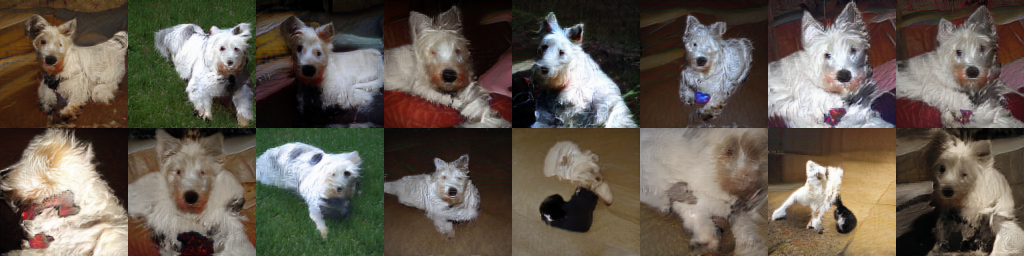

In [132]:
z, y = prepare_z_y(16, 120, 1000, device='cuda:0')
y = 203 * torch.ones_like(y) #340, 404
# y = torch.range(start=200, end=215, dtype=int, device='cuda:0')
y = g.shared(y)
out = g(z, y)
result_image = ToPILImage()(make_grid(out.detach().cpu(), normalize=True, scale_each=True, range=(-1, 1), padding=0))
result_image

In [21]:
%cd ..

/content


## Prepare images and embeddings

In [24]:
clip_filename = 'CLIP_ViT-B-32'

image_embeddings = torch.load(f'drive/MyDrive/embeddings/coco_val2014/image/{clip_filename}.pt', map_location='cpu')
text_embeddings = torch.load(f'drive/MyDrive/embeddings/coco_val2014/text/{clip_filename}_0.pt', map_location='cpu')

wave_image_embeddings = torch.load(f'drive/MyDrive/embeddings/coco_val2014_wave/image/{clip_filename}.pt', map_location='cpu')
wave_text_embeddings = torch.load(f'drive/MyDrive/embeddings/coco_val2014_wave/text/{clip_filename}_0.pt', map_location='cpu')

udnie_image_embeddings = torch.load(f'drive/MyDrive/embeddings/coco_val2014_udnie/image/{clip_filename}.pt', map_location='cpu')
udnie_text_embeddings = torch.load(f'drive/MyDrive/embeddings/coco_val2014_udnie/text/{clip_filename}_0.pt', map_location='cpu')
udnie_image_embeddings.shape

torch.Size([40504, 512])

In [26]:
style_vector = (udnie_image_embeddings - image_embeddings).mean(0)

In [145]:
!ls val2014/

Streaming output truncated to the last 5000 lines.
COCO_val2014_000000218439.jpg  COCO_val2014_000000510343.jpg
COCO_val2014_000000218456.jpg  COCO_val2014_000000510351.jpg
COCO_val2014_000000218470.jpg  COCO_val2014_000000510358.jpg
COCO_val2014_000000218476.jpg  COCO_val2014_000000510383.jpg
COCO_val2014_000000218494.jpg  COCO_val2014_000000510395.jpg
COCO_val2014_000000218561.jpg  COCO_val2014_000000510449.jpg
COCO_val2014_000000218587.jpg  COCO_val2014_000000510515.jpg
COCO_val2014_000000218608.jpg  COCO_val2014_000000510527.jpg
COCO_val2014_000000218637.jpg  COCO_val2014_000000510548.jpg
COCO_val2014_000000218646.jpg  COCO_val2014_000000510559.jpg
COCO_val2014_000000218678.jpg  COCO_val2014_000000510579.jpg
COCO_val2014_000000218687.jpg  COCO_val2014_000000510585.jpg
COCO_val2014_000000218703.jpg  COCO_val2014_000000510587.jpg
COCO_val2014_000000218716.jpg  COCO_val2014_000000510593.jpg
COCO_val2014_000000218721.jpg  COCO_val2014_000000510606.jpg
COCO_val2014_000000218736.jpg  COC

In [160]:
filename = '000000290798.jpg' #'000000263758.jpg'
# 000000581929

orig_image = 'val2014/COCO_val2014_' + filename
undie_image = 'val2014_udnie_preserve_color/COCO_val2014_' + filename

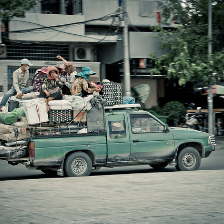

In [161]:
orig_tensor = CenterCrop(224)(Resize(224)(ToTensor()(PIL.Image.open(orig_image))))
orig_tensor_gan = Resize(128)(orig_tensor).cuda() # for MSE loss
ToPILImage()(orig_tensor)

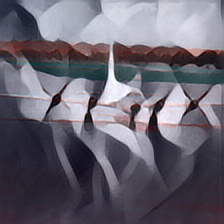

In [59]:
undie_tensor = ToTensor()(PIL.Image.open(undie_image))

PIL.Image.open(undie_image)

## Image optimization

In [29]:
!git clone https://github.com/orpatashnik/StyleCLIP

Cloning into 'StyleCLIP'...
remote: Enumerating objects: 605, done.
remote: Total 605 (delta 0), reused 0 (delta 0), pack-reused 605
Receiving objects: 100% (605/605), 166.04 MiB | 16.51 MiB/s, done.
Resolving deltas: 100% (196/196), done.


In [30]:
!conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=<CUDA_VERSION>
!pip install ftfy regex tqdm gdown
!pip install git+https://github.com/openai/CLIP.git

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=<CUDA_VERSION>'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 81 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-6wglk4nx
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-6wglk4nx
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369387 sha256=de7a9bdbfa57656937e462ff9b6cf99130d1e8fa7279aebe4ccf6d15831c96ce
  Stored in directory: /tmp/pip-ephem-wheel-cache-sihw_t0y/wheels/fd/b9/c3/5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
Successfully built clip


In [162]:
%cd StyleCLIP

/content/StyleCLIP


In [73]:
import argparse
import math
import os

import torch
import torchvision
from torch import optim
from tqdm import tqdm

from criteria.clip_loss import CLIPLoss
from criteria.id_loss import IDLoss
from mapper.training.train_utils import STYLESPACE_DIMENSIONS
from models.stylegan2.model import Generator
import clip

STYLESPACE_INDICES_WITHOUT_TORGB = [i for i in range(len(STYLESPACE_DIMENSIONS)) if i not in list(range(1, len(STYLESPACE_DIMENSIONS), 3))]

def get_lr(t, initial_lr, rampdown=0.25, rampup=0.05):
    # return 0.1
    lr_ramp = min(1, (1 - t) / rampdown)
    lr_ramp = 0.5 - 0.5 * math.cos(lr_ramp * math.pi)
    lr_ramp = lr_ramp * min(1, t / rampup)

    return initial_lr * lr_ramp

parser = argparse.ArgumentParser()
parser.add_argument("--description", type=str, default="a person with purple hair", help="the text that guides the editing/generation")
parser.add_argument("--ckpt", type=str, default="../pretrained_models/stylegan2-ffhq-config-f.pt", help="pretrained StyleGAN2 weights")
parser.add_argument("--stylegan_size", type=int, default=1024, help="StyleGAN resolution")
parser.add_argument("--lr_rampup", type=float, default=0.05)
parser.add_argument("--lr", type=float, default=0.1)
parser.add_argument("--step", type=int, default=2000, help="number of optimization steps")
parser.add_argument("--mode", type=str, default="edit", choices=["edit", "free_generation"], help="choose between edit an image an generate a free one")
parser.add_argument("--l2_lambda", type=float, default=0.008, help="weight of the latent distance (used for editing only)")
parser.add_argument("--id_lambda", type=float, default=0.000, help="weight of id loss (used for editing only)")
parser.add_argument("--latent_path", type=str, default=None, help="starts the optimization from the given latent code if provided. Otherwose, starts from"
                                                                    "the mean latent in a free generation, and from a random one in editing. "
                                                                    "Expects a .pt format")
parser.add_argument("--truncation", type=float, default=0.7, help="used only for the initial latent vector, and only when a latent code path is"
                                                                    "not provided")
parser.add_argument('--work_in_stylespace', default=False, action='store_true')
parser.add_argument("--save_intermediate_image_every", type=int, default=20, help="if > 0 then saves intermidate results during the optimization")
parser.add_argument("--results_dir", type=str, default="results")
parser.add_argument('--ir_se50_weights', default='../pretrained_models/model_ir_se50.pth', type=str,
                            help="Path to facial recognition network used in ID loss")

args, unknown = parser.parse_known_args()

In [ ]:
import torch
import clip
from torchvision.transforms import Resize, CenterCrop, Normalize, Compose
from torch.nn import functional as F


class CLIPLoss(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.model, _ = clip.load("ViT-B/32", device="cuda")
        self.model = self.model.float()
        self.preprocess = Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))

    def forward(self, image, desired_embedding):
        image = self.preprocess(image)
        image_embedding = self.model.encode_image(image)
        loss = F.mse_loss(image_embedding, desired_embedding)
        return loss

In [74]:
clip_loss = CLIPLoss()

In [71]:
orig_clip_latent = clip_loss.model.encode_image(orig_tensor.unsqueeze(0).cuda())
udnie_clip_latent = clip_loss.model.encode_image(undie_tensor.unsqueeze(0).cuda())

In [75]:
# check that loss works
clip_loss(torch.randn((1, 3, 224, 224), device='cuda'), orig_clip_latent.cuda())

tensor(0.2345, device='cuda:0', grad_fn=<MseLossBackward0>)

In [166]:
alpha = 1
# desired_latent = udnie_clip_latent.float()
# desired_latent = orig_clip_latent.cuda().float()
# desired_latent = style_vector.cuda()
# desired_latent = orig_clip_latent + alpha * style_vector.cuda()
desired_latent = udnie_image_embeddings.mean(0, keepdims=True).detach().cuda()

/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "


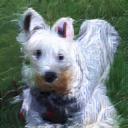

loss: 0.2363;:   0%|          | 0/2000 [00:00<?, ?it/s]

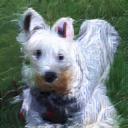

loss: 0.2206;:   1%|          | 19/2000 [00:01<02:22, 13.87it/s]

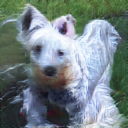

loss: 0.1967;:   2%|▏         | 39/2000 [00:03<02:18, 14.20it/s]

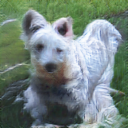

loss: 0.1789;:   3%|▎         | 59/2000 [00:04<02:19, 13.95it/s]

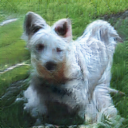

loss: 0.1926;:   4%|▍         | 79/2000 [00:05<02:17, 13.93it/s]

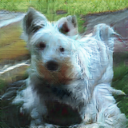

loss: 0.1875;:   5%|▍         | 99/2000 [00:07<02:19, 13.62it/s]

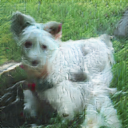

loss: 0.1764;:   6%|▌         | 119/2000 [00:08<02:16, 13.75it/s]

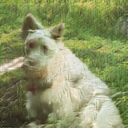

loss: 0.1630;:   7%|▋         | 139/2000 [00:10<02:19, 13.33it/s]

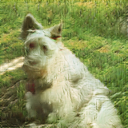

loss: 0.1552;:   8%|▊         | 159/2000 [00:11<02:16, 13.50it/s]

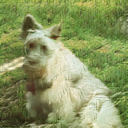

loss: 0.1497;:   9%|▉         | 179/2000 [00:13<02:19, 13.08it/s]

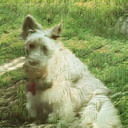

loss: 0.1598;:  10%|▉         | 199/2000 [00:15<02:14, 13.40it/s]

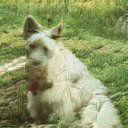

loss: 0.1493;:  11%|█         | 219/2000 [00:16<02:15, 13.16it/s]

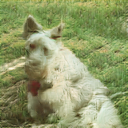

loss: 0.1468;:  12%|█▏        | 239/2000 [00:18<02:10, 13.50it/s]

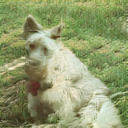

loss: 0.1433;:  13%|█▎        | 259/2000 [00:19<02:13, 13.08it/s]

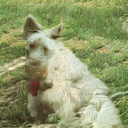

loss: 0.1414;:  14%|█▍        | 279/2000 [00:21<02:11, 13.06it/s]

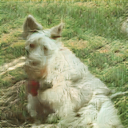

loss: 0.1393;:  15%|█▍        | 299/2000 [00:22<02:09, 13.14it/s]

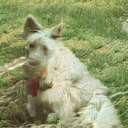

loss: 0.1409;:  16%|█▌        | 319/2000 [00:24<02:07, 13.19it/s]

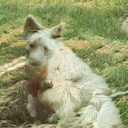

loss: 0.1435;:  17%|█▋        | 339/2000 [00:25<02:06, 13.15it/s]

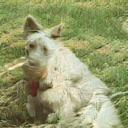

loss: 0.1451;:  18%|█▊        | 359/2000 [00:27<02:02, 13.43it/s]

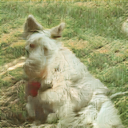

loss: 0.1366;:  19%|█▉        | 379/2000 [00:28<02:05, 12.90it/s]

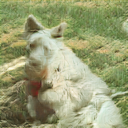

loss: 0.1595;:  20%|█▉        | 399/2000 [00:30<02:07, 12.56it/s]

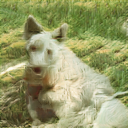

loss: 0.1453;:  21%|██        | 419/2000 [00:32<02:03, 12.84it/s]

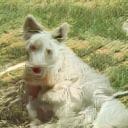

loss: 0.1404;:  22%|██▏       | 439/2000 [00:33<02:02, 12.77it/s]

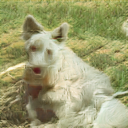

loss: 0.1372;:  23%|██▎       | 459/2000 [00:35<01:57, 13.12it/s]

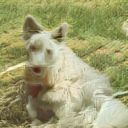

loss: 0.1359;:  24%|██▍       | 479/2000 [00:36<01:57, 12.98it/s]

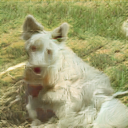

loss: 0.1344;:  25%|██▍       | 499/2000 [00:38<01:59, 12.59it/s]

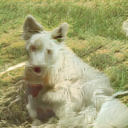

loss: 0.1329;:  26%|██▌       | 519/2000 [00:40<01:57, 12.57it/s]

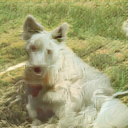

loss: 0.1319;:  27%|██▋       | 539/2000 [00:41<01:56, 12.55it/s]

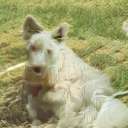

loss: 0.1315;:  28%|██▊       | 559/2000 [00:43<01:55, 12.44it/s]

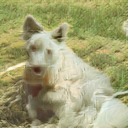

loss: 0.1306;:  29%|██▉       | 579/2000 [00:44<01:56, 12.22it/s]

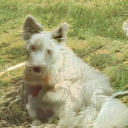

loss: 0.1297;:  30%|██▉       | 599/2000 [00:46<01:51, 12.60it/s]

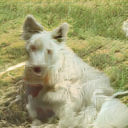

loss: 0.1289;:  31%|███       | 619/2000 [00:48<01:51, 12.35it/s]

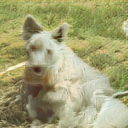

loss: 0.1280;:  32%|███▏      | 639/2000 [00:49<01:50, 12.34it/s]

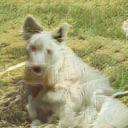

loss: 0.1277;:  33%|███▎      | 659/2000 [00:51<01:49, 12.20it/s]

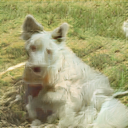

loss: 0.1266;:  34%|███▍      | 679/2000 [00:53<01:46, 12.37it/s]

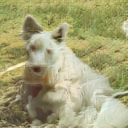

loss: 0.1256;:  35%|███▌      | 700/2000 [00:55<01:56, 11.13it/s]

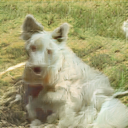

loss: 0.1258;:  36%|███▌      | 720/2000 [00:57<01:43, 12.39it/s]

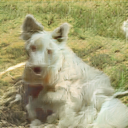

loss: 0.1249;:  37%|███▋      | 739/2000 [00:59<02:39,  7.89it/s]

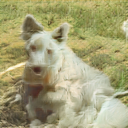

loss: 0.1238;:  38%|███▊      | 760/2000 [01:01<01:50, 11.24it/s]

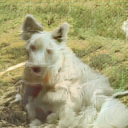

loss: 0.1233;:  39%|███▉      | 780/2000 [01:05<03:11,  6.38it/s]

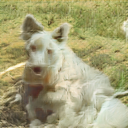

loss: 0.1229;:  40%|███▉      | 794/2000 [01:06<01:47, 11.19it/s]

In [ ]:
os.makedirs(args.results_dir, exist_ok=True)

latent, y = prepare_z_y(1, g.dim_z, g.n_classes)
y = 203 * torch.ones_like(y)
y = g.shared(y).cuda()
latent.cuda()

img_gen = g(latent, y).float()
result_image1 = ToPILImage()(make_grid(img_gen.detach().cpu(), normalize=True, scale_each=True, range=(-1, 1), padding=0))
display.display(result_image1)

desired_latent = desired_latent.detach();

with torch.no_grad():
    img_orig = g(latent, y)

latent.requires_grad = True

clip_loss = CLIPLoss()

optimizer = optim.Adam([latent], lr=args.lr)

pbar = tqdm(range(args.step))

for i in pbar:
    t = i / args.step
    lr = get_lr(t, args.lr)
    # lr = 0.1
    # # if i < 100:
    # #     lr = 0.1
    # # elif i < 500:
    # #     lr = 0.01
    # # else:
    # #     lr = 0.001
    optimizer.param_groups[0]["lr"] = lr

    img_gen = g(latent, y).float()
    img_clip = torch.nn.functional.interpolate(img_gen, size=(224, 224))

    loss = 0
    loss += clip_loss(img_clip, desired_latent)
    # loss += 0.5 * F.mse_loss(orig_tensor_gan, img_gen)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    pbar.set_description(
        (
            f"loss: {loss.item():.4f};"
        )
    )
    if args.save_intermediate_image_every > 0 and i % args.save_intermediate_image_every == 0:
        with torch.no_grad():
            img_gen = g(latent, y)
        # torchvision.utils.save_image(img_gen.detach().cpu(), f"results/{str(i).zfill(5)}.jpg", normalize=True, range=(-1, 1))
        result_image = ToPILImage()(make_grid(img_gen.detach().cpu(), normalize=True, scale_each=True, range=(-1, 1), padding=0))
        display.display(result_image)

if args.mode == "edit":
    final_result = torch.cat([img_orig, img_gen])
else:
    final_result = img_gen


# torchvision.utils.save_image(final_result.detach().cpu(), os.path.join(args.results_dir, "final_result.jpg"), normalize=True, scale_each=True, range=(-1, 1))
